# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).


El primer paso es importar las respectivas librerías. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

--------
**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

> En este caso, se puede observar 2 a 3 grupos al graficar el ancho vs el largo del sépalo. Un grupo estando del lado superior izquierdo y otro u otros dos en la parte inferior y parte inferior derecha.

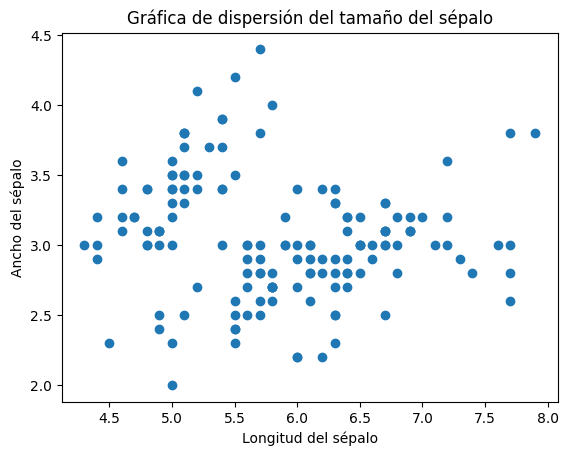

In [16]:
# Cargar datos
iris_data = pd.read_csv('iris.csv')

# Crear una gráfica de dispersión de los datos de longitud y ancho del sépalo
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'])
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  


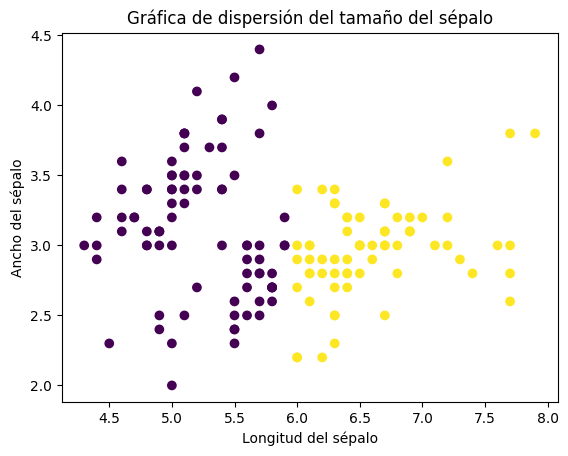

In [17]:
# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2, n_init="auto")

# Ajustar el modelo a los datos
kmeans.fit(iris_data[['sepal_length', 'sepal_width']])

# Obtener las etiquetas de los clusters
labels = kmeans.predict(iris_data[['sepal_length', 'sepal_width']])

# Graficar los resultados
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=labels)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

> En este caso, se presenta una diferencia entre los grupos creados anteriormente y los nuevos grupos. Esto ya que anteriormente los grupos parecían ser creados con una línea vertical separando a ambos. En este caso, con los datos estandarizados, los grupos parecen ser creados de una manera más lógia. Esto ya que estos son creados con relación (a simple vista) a qué puntos tienen cerca.

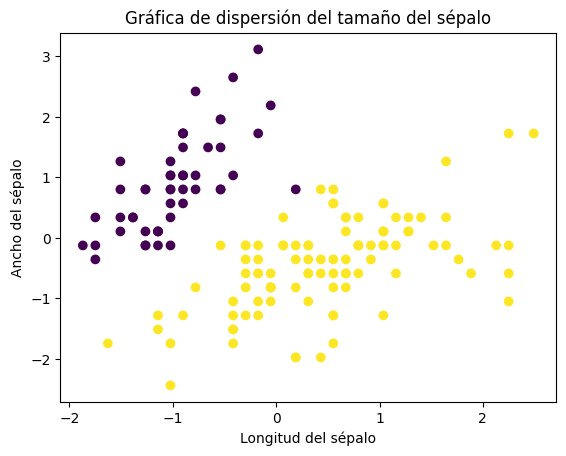

In [18]:
# Crear una gráfica de dispersión de los datos de longitud y ancho del pétalo
scaler = StandardScaler()

# Estandarizar los datos
scaled_data = scaler.fit_transform(iris_data[['sepal_length', 'sepal_width']])

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)

# Graficar los resultados
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

> Según el método del codo, el valor ideal de clusters sería entre 3 a 4 clusters. Ya que es en estos puntos donde el valor de inertia se empieza a estabilizar y es en este punto donde se encuentra el respectivo "codo".

> Nosotros nos inclinamos más por el valor de 3 como el número ideal de clusters. 

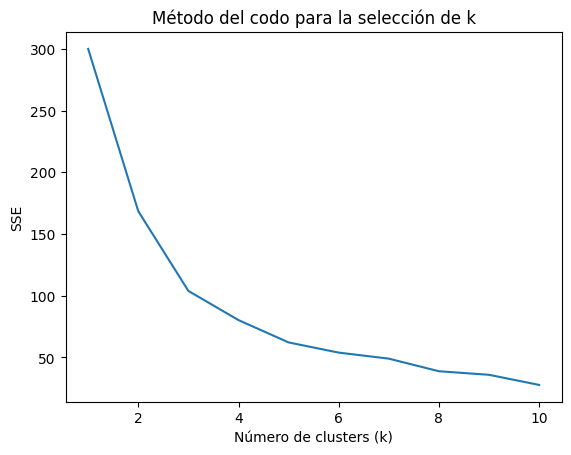

In [19]:
sse = []
k_range = range(1, 11)

for k in k_range:
    # Creamos un modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
# Graficamos los resultados
plt.plot(k_range, sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo para la selección de k')
plt.show()

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

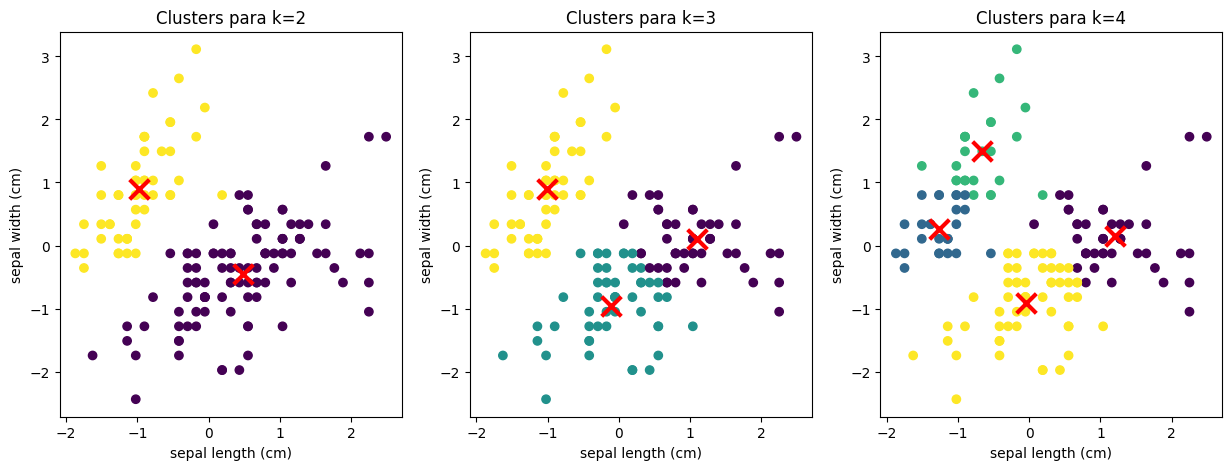

In [20]:
# Crear el modelo de clusterización con 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans_2.fit(scaled_data)

# Crear el modelo de clusterización con 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_3.fit(scaled_data)

# Crear el modelo de clusterización con 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans_4.fit(scaled_data)

fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Graficamos los resultados para dos clusters
axs[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_2.labels_)
axs[0].scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[0].set_xlabel('sepal length (cm)')
axs[0].set_ylabel('sepal width (cm)')
axs[0].set_title('Clusters para k=2')

# Graficamos los resultados para tres clusters
axs[1].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_3.labels_)
axs[1].scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[1].set_xlabel('sepal length (cm)')
axs[1].set_ylabel('sepal width (cm)')
axs[1].set_title('Clusters para k=3')

# Graficamos los resultados para cuatro clusters
axs[2].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_4.labels_)
axs[2].scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[2].set_xlabel('sepal length (cm)')
axs[2].set_ylabel('sepal width (cm)')
axs[2].set_title('Clusters para k=4')

plt.show()

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

> Previamente se había indicado que el valor más correcto de la cantidad de clusters era igual a 3. En este caso, esto se vio confirmado. Sin embargo, cabe destacar que en los datos reales hay puntos de versicolor y virginica que "invaden" los clusters experimentales que se plantearon anteriormente.

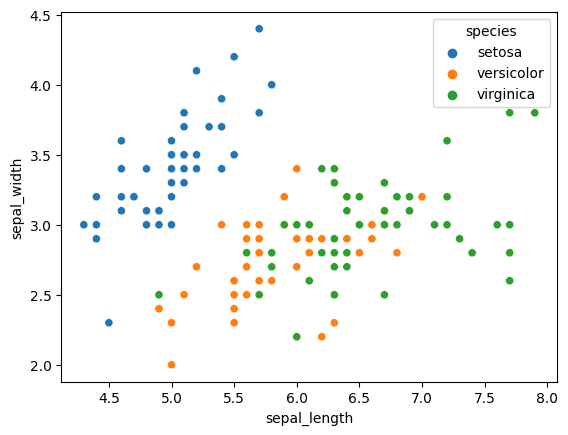

In [21]:
# Cargamos los datos con las respuestas
iris_data = pd.read_csv('iris-con-respuestas.csv')

# Graficamos los datos
fig, axs = plt.subplots()
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_data)
plt.show()

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?
> Previamente se había indicado que el valor correcto de la cantidad de clusters era igual a 3. En este caso, esto se vio confirmado. Cabe destacar que esta información se determinó con analizar el sepal length y sepal width, por lo cual se puede concluir que sí funcionó el clustering con la forma de sépalo. 

> Sin embargo, cabe destacar que en los datos reales hay puntos de versicolor y virginica que "invaden" los clusters experimentales que se plantearon anteriormente. Sin embargo, son unos pocos puntos que se determinaron de forma incorrecta. Como resultado, se puede concluir que sí funcionó el cluster con forma de sépalo pero podría ser mejor. 


-------
**Sección 2:**
Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas
1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del pétalo:
> En este caso, se puede observar 2 grupos al graficar el ancho vs el largo del petalo. Un grupo estando del lado inferior izquierdo y otro parte superior derecha.

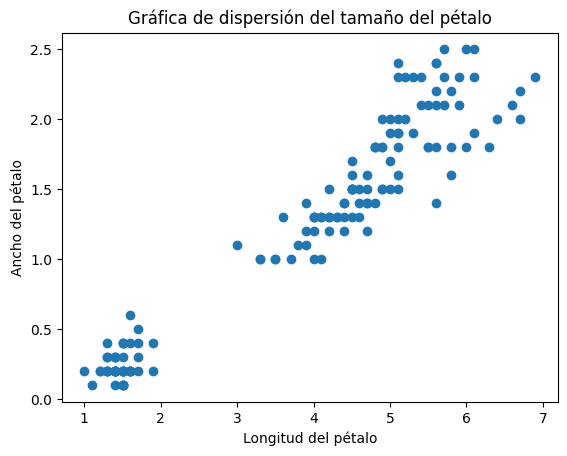

In [22]:
# Cargamos los datos
iris_data = pd.read_csv('iris.csv')

# Creen una gráfica de dispersión de los datos de longitud y ancho del pétalo
plt.scatter(iris_data['petal_length'], iris_data['petal_width'])
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Gráfica de dispersión del tamaño del pétalo')
plt.show()

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  


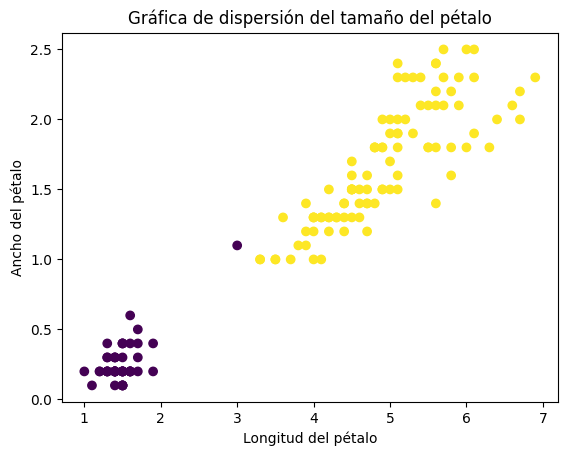

In [23]:
# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(iris_data[['petal_length', 'petal_width']])
labels = kmeans.predict(iris_data[['petal_length', 'petal_width']])

# Graficar los resultados
plt.scatter(iris_data['petal_length'], iris_data['petal_width'], c=labels)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Gráfica de dispersión del tamaño del pétalo')
plt.show()

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

> En este caso se puede observar que hay un punto que anteriormente estaba siendo clasificado como parte de un grupo, a pesar de que estaba muy alejado del mismo. Sin embargo, ahora está clasificado como parte del grupo que está cerca del mismo.

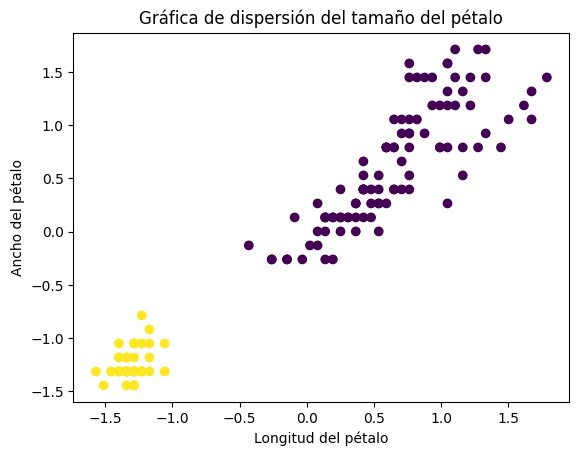

In [24]:
# Crear una gráfica de dispersión de los datos de longitud y ancho del sépalo
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data[['petal_length', 'petal_width']])

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)

# Graficar los resultados
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Gráfica de dispersión del tamaño del pétalo')
plt.show()

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

> Según el método del codo, el valor ideal de clusters sería 3. Ya que es en este punto donde el valor de inertia se empieza a estabilizar y es en este punto donde se encuentra el respectivo "codo".

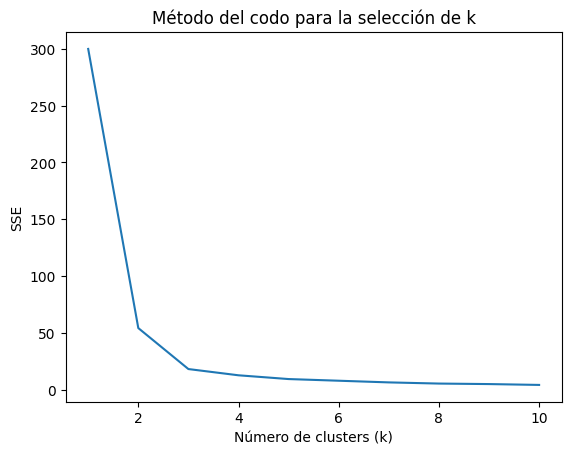

In [25]:
sse = []
k_range = range(1, 11)

for k in k_range:
    # creamos un modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
# Graficamos los resultados
plt.plot(k_range, sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo para la selección de k')
plt.show()

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

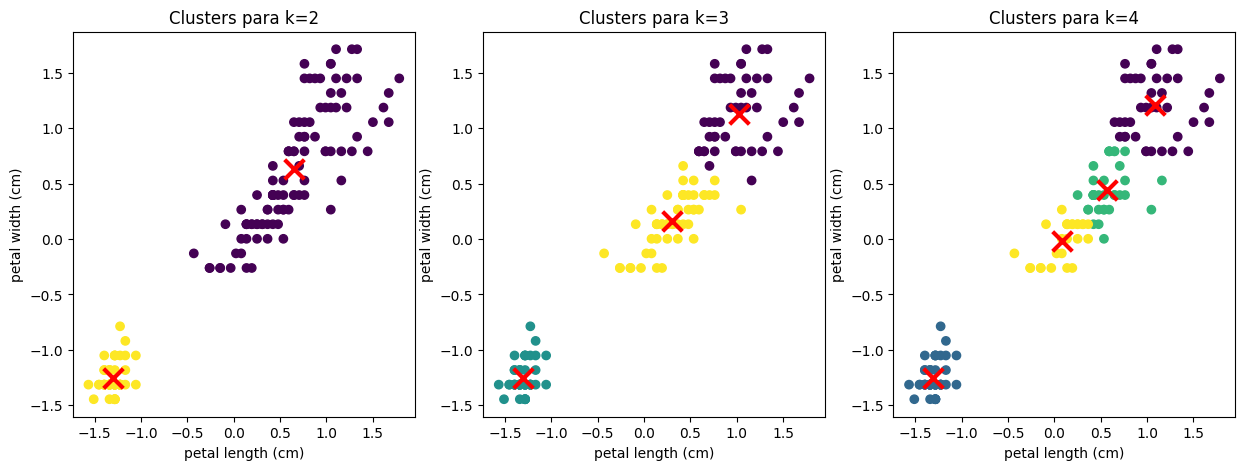

In [26]:
# Creamos un modelo KMeans con 2 clusters y ajustamos el modelo a los datos estandarizados
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans_2.fit(scaled_data)

# Creamos un objeto KMeans con 3 clusters y ajustamos el modelo a los datos estandarizados
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_3.fit(scaled_data)

# Creamos un objeto KMeans con 4 clusters y ajustamos el modelo a los datos estandarizados
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans_4.fit(scaled_data)

# Creamos una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Graficamos los resultados para dos clusters
axs[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_2.labels_)
axs[0].scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[0].set_xlabel('petal length (cm)')
axs[0].set_ylabel('petal width (cm)')
axs[0].set_title('Clusters para k=2')

# Graficamos los resultados para tres clusters
axs[1].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_3.labels_)
axs[1].scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[1].set_xlabel('petal length (cm)')
axs[1].set_ylabel('petal width (cm)')
axs[1].set_title('Clusters para k=3')

# Graficamos los resultados para cuatro clusters
axs[2].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_4.labels_)
axs[2].scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[2].set_xlabel('petal length (cm)')
axs[2].set_ylabel('petal width (cm)')
axs[2].set_title('Clusters para k=4')

plt.show()

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

> Previamente se había indicado que el valor más correcto de la cantidad de clusters era igual a 3. En este caso, esto se vio confirmado. Sin embargo, cabe destacar que en los datos reales hay puntos de versicolor y virginica que "invaden" los clusters experimentales que se plantearon anteriormente. 

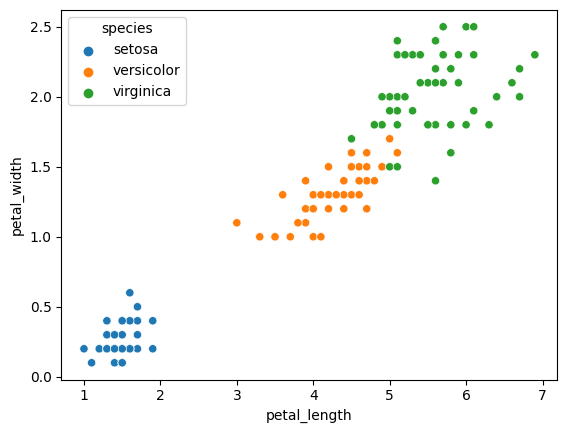

In [27]:
# Cargamos los datos con las respuestas
iris_data = pd.read_csv('iris-con-respuestas.csv')

# Graficamos los datos
fig, axs = plt.subplots()
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_data)
plt.show()

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del pétalo?

> Previamente se había indicado que el valor correcto de la cantidad de clusters era igual a 3. En este caso, esto se vio confirmado. Cabe destacar que esta información se determinó con analizar el petal length y petal width, por lo cual se puede concluir que sí funcionó el clustering con la forma de pétalo. 

> Sin embargo, cabe destacar que en los datos reales hay puntos de versicolor y virginica que "invaden" los clusters experimentales que se plantearon anteriormente. A pesar de que hay puntos que fueron clasificados de forma incorrecta, cabe destacar que la cantidad de puntos clasificados equivocadamente es menor a la cantidad de puntos clasificados incorrectamente en los modelos que analizaban "sepal length" y "sepal width".

> Como resultado, se puede concluir que el clustering con la forma de pétalo presentó mejores resultados que el clustering con la forma de sépalo. 

--------
**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

> En este caso, a través de la librería Kneed, se obtuvo el mismo valor de clusters a utilizar con el método del "codo". En ambos casos se tuvo 3 clusters, lo cual coincide con la cantidad de especies de flores dentro del archivo de iris con respuestas. 

> Basado en los resultados, se puede concluir que el clustering con la forma del pétalo presentó mejores resultados. Esto debido a que este no mezcló los clusters a tanto nivel comparado con el clustering con la forma de sépalo. Asimismo, en ambos casos se logró poder obtener la cantidad correcta de clusters en base al método de codo. 

> Otra conclusión importante a hacer es que los clusters se crean de mejor manera cuando se estandarizan los datos. Esto siendo muy importante, ya que de no hacer este paso, se puede terminar con agrupaciones aún con más errores. 

In [28]:
import pandas as pd
from kneed import KneeLocator

from sklearn.cluster import KMeans

df = pd.read_csv('iris.csv')
X = df.values

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto")
kmeans.fit(X)

distortions = []
for i in range(1, 11):
    # Creamos un modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Obtener el número óptimo de clusters 
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
print("Número óptimo de clusters:", kl.elbow)



Número óptimo de clusters: 3
